<a href="https://colab.research.google.com/github/FelixSchmid/ML_exercises/blob/master/Playing_with_surrogate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from scipy.stats import pearsonr

# Pearson correlation, PCA and KNN

In this notebook, we play around with surrogate data to observe the behavior of Pearson correlation, PCA and KNN.



#### 1. a)

x: mean = -0.018 stdv = 1.995
y: mean = 3.989 stdv = 5.702


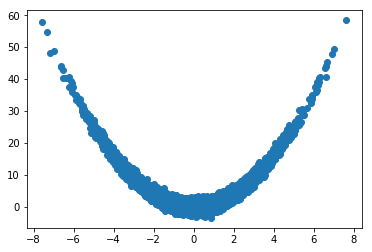

Pearsons correlation: -0.009


In [0]:
x = 2*randn(10000) 
y = x**2 + randn(10000)# nonlinear correlation
print('x: mean = %.3f stdv = %.3f' % (mean(x), std(x)))
print('y: mean = %.3f stdv = %.3f' % (mean(y), std(y)))
pyplot.scatter(x, y)
pyplot.show()
corr, _ = pearsonr(x, y) # close to zero
print('Pearsons correlation: %.3f' % corr)

A pearson correlation of 0 does not mean independence. Pearson correlation does measure linear relationships.

#### 1. b)

Pearsons correlation: 1.000


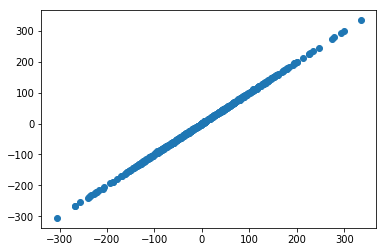

In [0]:
def surr(p = 0.5):
    sample = 500
    x = 100*randn(sample) 
    y = -x + randn(sample)
    y2 = x + randn(sample)
    y[:int(p*sample)] = y2[:int(p*sample)]    
    corr, _ = pearsonr(x, y) # close to zero
    print('Pearsons correlation: %.3f' % corr)
    #print('x: mean = %.3f stdv = %.3f' % (mean(x), std(x)))
    #print('y: mean = %.3f stdv = %.3f' % (mean(y), std(y)))
    pyplot.scatter(x, y)
    pyplot.show()
    return x, y, corr

x, y , corr = surr(p = 1)

Pearsons correlation: 0.004


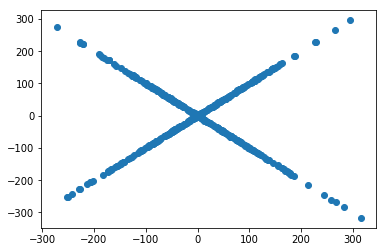

In [0]:
x, y , corr = surr(p = 0.5)

Pearsons correlation: 0.496


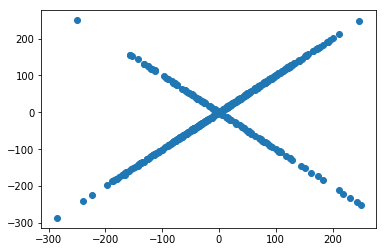

In [0]:
x, y , corr = surr(p = 0.75)

Pearsons correlation: -0.507


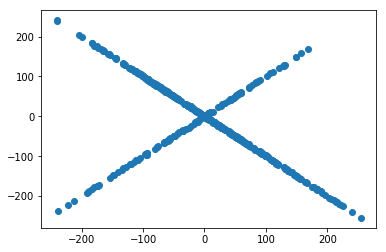

In [0]:
x, y , corr = surr(p = -0.75)

Pearsons correlation: -1.000


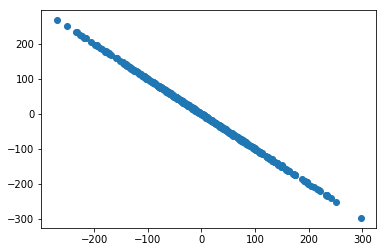

In [0]:
x, y , corr = surr(p = -1)

#### 1. c)

x: mean = -0.010 stdv = 1.010
y: mean = -0.012 stdv = 0.964
z: mean = -0.002 stdv = 1.711


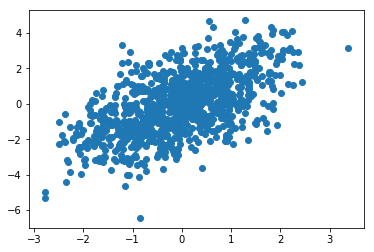

Pearsons correlation xy: 0.004
Pearsons correlation xz: 0.589


In [0]:
x = randn(1000)
y = randn(1000)
z = randn(1000) + x + y # Commen effect model
print('x: mean = %.3f stdv = %.3f' % (mean(x), std(x)))
print('y: mean = %.3f stdv = %.3f' % (mean(y), std(y)))
print('z: mean = %.3f stdv = %.3f' % (mean(z), std(z)))
pyplot.scatter(x, z)
pyplot.show()
corrxy, _ = pearsonr(x, y)
print('Pearsons correlation xy: %.3f' % corrxy)
corrxz, _ = pearsonr(x, z)
print('Pearsons correlation xz: %.3f' % corrxz)

#### 1. d)

#### 2. PCA (a) 

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=4, n_features=20, random_state=1, center_box=(-1,1))
print(X.shape)
print(y.shape)

(400, 20)
(400,)


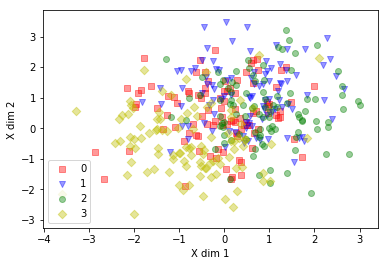

In [0]:
# Visualize the data: These are only the first 2 dimensions of 10
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'v', 'o', 'D']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], # Pick x component for label
                X[y==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('X dim 1')
plt.ylabel('X dim 2')
plt.legend(loc='lower left')
plt.show()

In [0]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

In [0]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # Does not work....always....Setup marker generator and color map: FIXED!
    markers = ('s', 'v', 'o', 'D') 
    colors = ('r', 'b', 'g', 'y')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Z is the prediction of the class, given point in plane
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Z=f(xx1,yy1), plot classes in plane using color map but opaque
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points, given labels
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

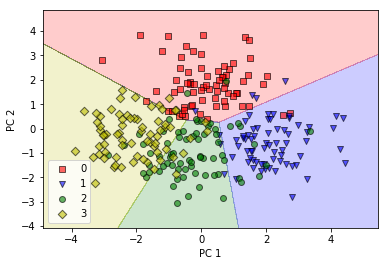

In [0]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

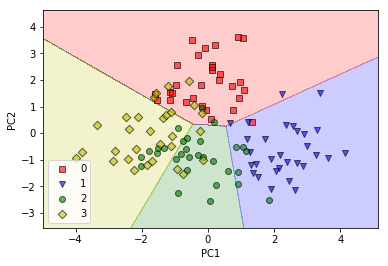

In [0]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

#### 2. PCA (b)

Text(0.5,0,'Z Label')

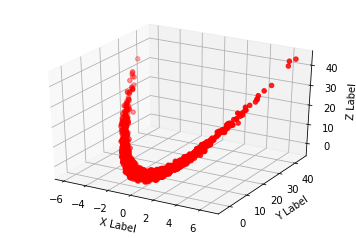

In [0]:
x = 2*randn(2000)
y1 = x**2 + randn(2000)
y2 = -x**2 + randn(2000) - 3
z1 = x**2 + randn(2000)
z2 = -x**2 + randn(2000) - 3

label1 = np.zeros((2000))+1
label2 = np.zeros((2000))+2

y1 = np.vstack((y1, label1)).T
y2 = np.vstack((y2, label2)).T
z1 = np.vstack((z1, label1)).T
z2 = np.vstack((z2, label2)).T

y = np.hstack((y1[:,:int(len(y1)/2)], y2[:,int(len(y2)/2):]))
z = np.hstack((z1[:,:int(len(z1)/2)], z2[:,int(len(z2)/2):]))

#print(z)
#print(z1.shape)
#print(z.shape)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y[:,0], z[:,0], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#
#plt.show()
#

#print(z.shape)
#plt.scatter(x, y, alpha = 0.6)
#plt.xlabel('X dim 1')
#plt.ylabel('X dim 2')
#plt.legend(loc='lower left')
#plt.show()

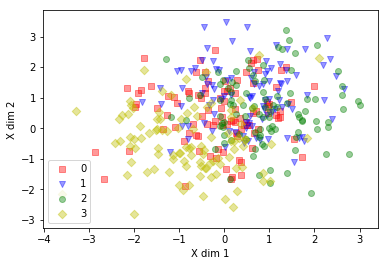

In [0]:
# Visualizing the data: Plotting only the first 2 dimensions of 10
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'v', 'o', 'D']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], # Pick x component for label
                X[y==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('X dim 1')
plt.ylabel('X dim 2')
plt.legend(loc='lower left')
plt.show()

In [0]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

In [0]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

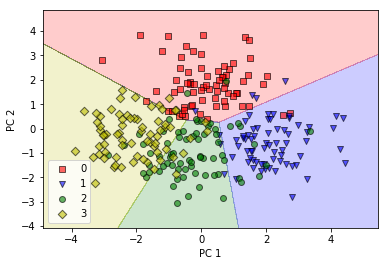

In [0]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

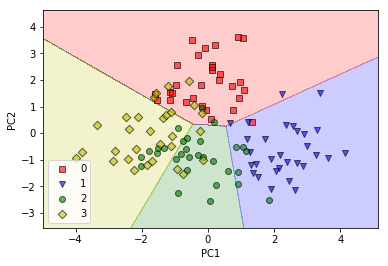

In [0]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

#### 3. K-Means (a)

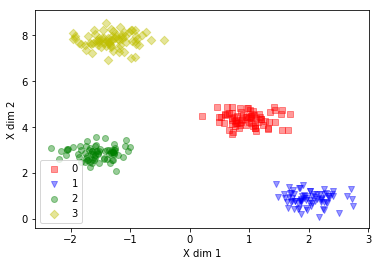

In [0]:
# Generate some random but clustered data
X, y = make_blobs(
    n_samples=300, n_features=2,
    centers=4, cluster_std=0.3,
    random_state=0)

# Visualize the data: These are only the first 2 dimensions of 10
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'v', 'o', 'D']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], # Pick x component for label
                X[y==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('X dim 1')
plt.ylabel('X dim 2')
plt.legend(loc='lower left')
plt.show()

In [0]:
# K Means Parameters
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# Call K mean prediction 
y_km = km.fit_predict(X)

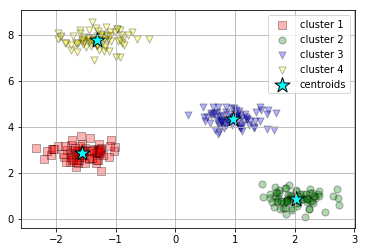

In [0]:
# Plot clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, color='red', alpha=0.3,
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, color='green', alpha=0.3,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, color='blue', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, color='yellow', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 4'
)


# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='cyan', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

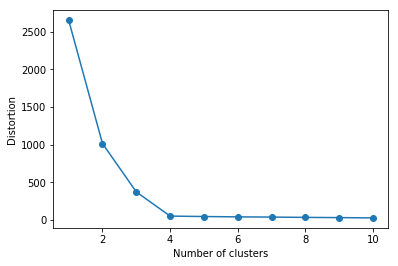

In [0]:
# Calculate distortion (SSE) for a range of number of cluster k
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# Plot the elbow (if any)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 3. K-Means (b)

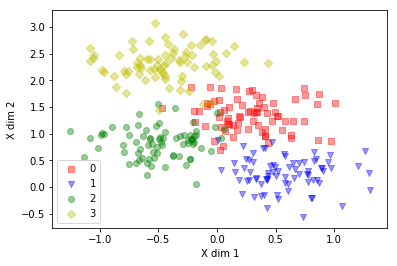

In [0]:
# Generate some random but clustered data
X, y = make_blobs(
    n_samples=300, n_features=2,
    centers=4, cluster_std=0.3,
    random_state=0, center_box = (-3,3))

# Visualize the data: These are only the first 2 dimensions of 10
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'v', 'o', 'D']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], # Pick x component for label
                X[y==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('X dim 1')
plt.ylabel('X dim 2')
plt.legend(loc='lower left')
plt.show()

In [0]:
# K Means Parameters
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# Call K mean prediction 
y_km = km.fit_predict(X)

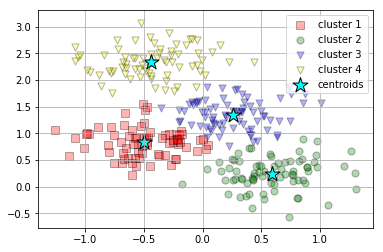

In [0]:
# Plot clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, color='red', alpha=0.3,
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, color='green', alpha=0.3,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, color='blue', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, color='yellow', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 4'
)


# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='cyan', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

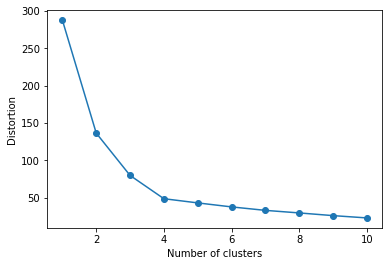

In [0]:
# Calculate distortion (SSE) for a range of number of cluster k
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# Plot the elbow (if any)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()